# NescienceDecisionTreeClassifier
## Detailed Evaluation

Detailed evaluation of the algorithm to compute a decision tree based on the minimum nescience principle, and a comparison with the decision tree algorithm implemented by scikit learn.

In [4]:
import pandas as pd
import numpy as np
import random

# Graphics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import graphviz

# Datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
# from sklearn.datasets import fetch_mldata

# Models
from Nescience.NescienceDecisionTreeClassifier import NescienceDecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Evaluation of models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn import tree
from sklearn.utils import shuffle

# Others
from sklearn.utils.estimator_checks import check_estimator

In [2]:
# rcParams['figure.figsize'] = 20, 10

## Synthetic Datasets

### One single line

In [5]:
# We always add this line for the reproducibility of results
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])
    X.append(p)
    
    if p[0] >= 50:
        y.append(1)
    else:
        y.append(0)

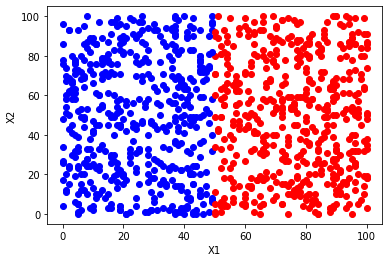

In [6]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [7]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [8]:
model.fit(X, y)

Miscoding:  0.030938210127634536 Inaccuracy:  0.0 Redundancy:  0.23750000000000004 Nescience:  2.999000658293393e-05
Final nescience: 2.999000658293393e-05
def tree{'X1'}:
    if X1 < 49.500:
        return 0
    else:
        return 1



NescienceDecisionTreeClassifier(verbose=True)

In [9]:
model.score(X, y)

1.0

Compare with scikit learn

In [10]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

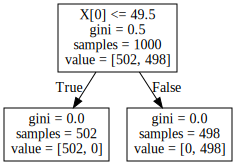

In [11]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

Nice! We have got the same results.

### One single line with small error

In [12]:
# We always add this line for the reproducibility of results
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])
    X.append(p)
    
    if p[0] >= 50:
        y.append(1)
    else:
        y.append(0)

Lets introduce a small error

In [13]:
p = list([20, 20])
X.append(p)
y.append(1)

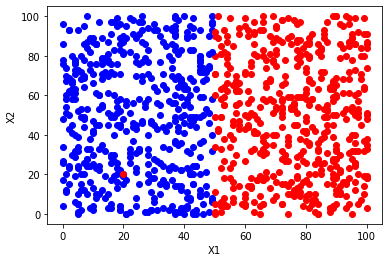

In [14]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])
        
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()        

In [15]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.0318179751218407 Inaccuracy:  0.0010033334273425907 Redundancy:  0.23750000000000004 Nescience:  0.002915150399159443
Miscoding:  0.0318179751218407 Inaccuracy:  0.0010033334273425907 Redundancy:  0.5 Nescience:  0.0029123204484535134
Miscoding:  0.0 Inaccuracy:  0.0010033334273425907 Redundancy:  0.5855855855855856 Nescience:  2.9703445158129905e-05
Final nescience: 0.0029123204484535134
def tree{'X1'}:
    if X1 < 49.500:
        if X1 < 2.500:
            return 0
        else:
            return 0
    else:
        return 1



NescienceDecisionTreeClassifier(verbose=True)

In [16]:
model.score(X, y)

0.999000999000999

Nice! The algorithm says that there is no point in trying to explain the error!

In [17]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

0.999000999000999

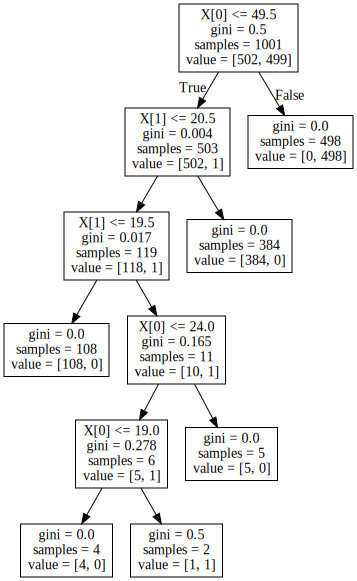

In [18]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

The standard algorith can not deal with the error properly.

Of course, we could limit the depth of the tree, or require a minimun number of samples per leaf, but that would imply to optimize an additional hyperparameter.

Lets check with a minimun number of 5 samples per leaf node, a standard technique to avoid overoptimization in decision trees.

In [19]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X, y)
model_sk.score(X, y)

0.999000999000999

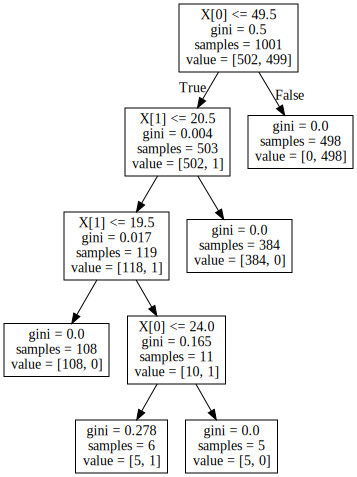

In [20]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

That's a surprising result!

### Two lines

In [21]:
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])
    X.append(p)
    
    if p[0] >= 50:
        y.append(1)
    else:
        if p[1] >= 20:
            y.append(0)
        else:
            y.append(1)

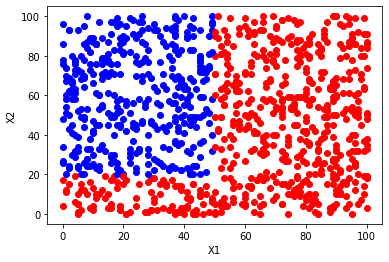

In [22]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])
        
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()        

In [23]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [24]:
model.fit(X, y)

Miscoding:  0.2542281402276628 Inaccuracy:  0.0806774484144103 Redundancy:  0.23750000000000004 Nescience:  0.17312507463385762
Miscoding:  0.0 Inaccuracy:  0.0 Redundancy:  0.4697986577181208 Nescience:  1.4999840358841897e-05
Final nescience: 1.4999840358841897e-05
def tree{'X2', 'X1'}:
    if X1 < 49.500:
        if X2 < 19.500:
            return 1
        else:
            return 0
    else:
        return 1



NescienceDecisionTreeClassifier(verbose=True)

In [25]:
model.score(X, y)

1.0

Compare with scikit learn

In [26]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

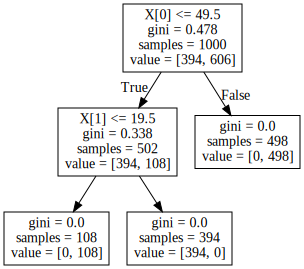

In [27]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

We have got the same result. Good!

### Three lines

In [28]:
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])    
    X.append(p)
    
    if p[0] >= 50:
        if p[1] >= 30:
            y.append(1)
        else:
            y.append(0)
    else:
        if p[1] >= 20:
            y.append(0)
        else:
            y.append(1)

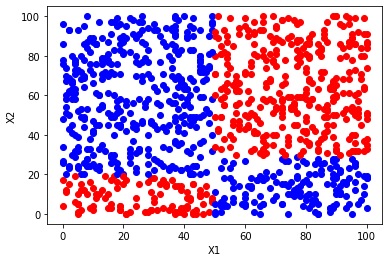

In [29]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [30]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [31]:
model.fit(X, y)

Miscoding:  0.35443486670200053 Inaccuracy:  0.2581984361604536 Redundancy:  0.23750000000000004 Nescience:  0.3898948100927974
Miscoding:  0.0 Inaccuracy:  0.12417367198133901 Redundancy:  0.44966442953020136 Nescience:  2.9996917181569028e-05
Miscoding:  0.0 Inaccuracy:  0.0 Redundancy:  0.5849056603773585 Nescience:  1.4999871775289664e-05
Final nescience: 1.4999871775289664e-05
def tree{'X2', 'X1'}:
    if X1 < 49.500:
        if X2 < 19.500:
            return 1
        else:
            return 0
    else:
        if X2 < 29.500:
            return 0
        else:
            return 1



NescienceDecisionTreeClassifier(verbose=True)

In [32]:
model.score(X, y)

1.0

Compare with scikit learn

In [33]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

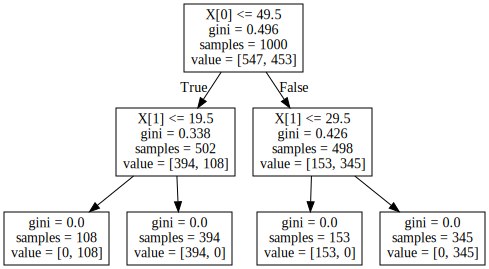

In [34]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

### Four lines

In [35]:
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])    
    X.append(p)
    
    if p[0] <= 50:
        if p[1] <= 70:
            if p[1] <= 30:
                y.append(0)
            else:
                y.append(1)
        else:
            y.append(0)
    else:
        if p[1] <= 80:
            if p[1] <= 20:
                y.append(1)
            else:
                y.append(0)
        else:
            y.append(1)

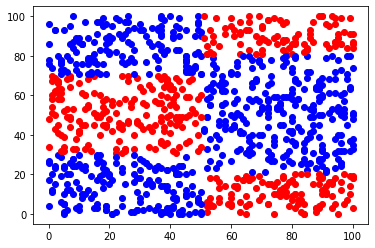

In [36]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

In [37]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [38]:
model.fit(X, y)

Miscoding:  0.12033514926513045 Inaccuracy:  0.4915415194211976 Redundancy:  0.23750000000000004 Nescience:  0.2644443925941701
Miscoding:  0.0 Inaccuracy:  0.43278546411256663 Redundancy:  0.4429530201342282 Nescience:  2.999900684878503e-05
Miscoding:  0.0 Inaccuracy:  0.43278546411256663 Redundancy:  0.5990566037735849 Nescience:  2.9998806076021096e-05
Miscoding:  0.0 Inaccuracy:  0.2740014089732481 Redundancy:  0.6445993031358885 Nescience:  2.9998439790859776e-05
Miscoding:  0.0 Inaccuracy:  0.1624849052433462 Redundancy:  0.6823204419889503 Nescience:  2.9997714172713986e-05
Miscoding:  0.0 Inaccuracy:  0.11441176908173907 Redundancy:  0.7171492204899776 Nescience:  2.9996959877259205e-05
Miscoding:  0.0 Inaccuracy:  0.07168009249364383 Redundancy:  0.7574626865671642 Nescience:  2.9995419377940185e-05
Miscoding:  0.0 Inaccuracy:  0.03922118268520134 Redundancy:  0.78330658105939 Nescience:  2.999197023007437e-05
Final nescience: 2.999197023007437e-05
def tree{'X2', 'X1'}:
    i

NescienceDecisionTreeClassifier(verbose=True)

In [39]:
model.score(X, y)

0.971

Compare with scikit-learn

In [40]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

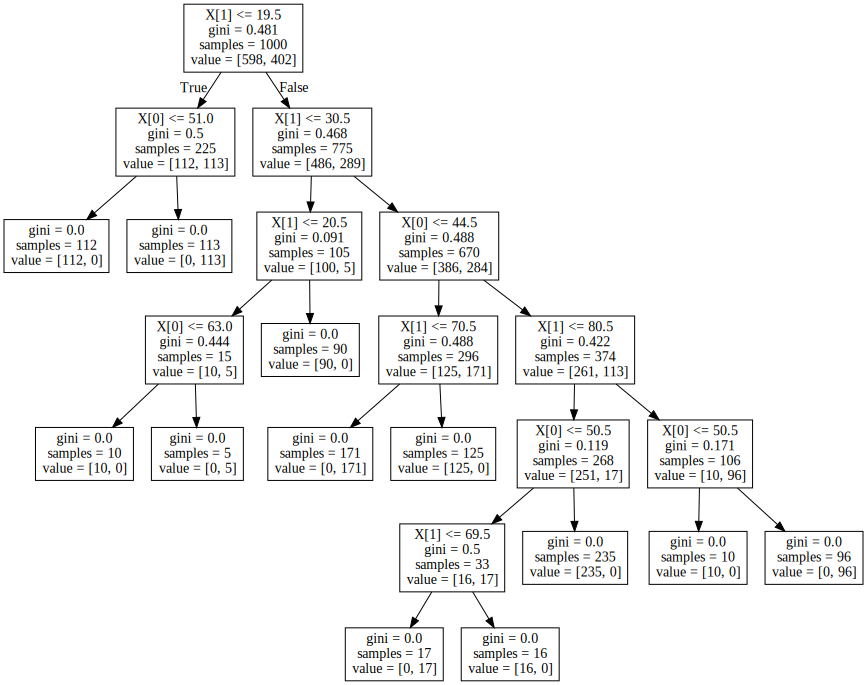

In [41]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

Lets force the ideal two levels

In [42]:
model_sk = DecisionTreeClassifier(max_depth=2)
model_sk.fit(X, y)
model_sk.score(X, y)

0.711

Can we conclude that the problem is that decision trees are not valid for this type of dataset? Is in this sence the theory of nescience right?

### Non linear dataset

In [43]:
random.seed(1)

X = list()
y = list()

for x in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])    
    X.append(p)
    
    if p[0]** 2 + p[1]**2 >= 50**2:
        y.append(1)
    else:
        y.append(0)

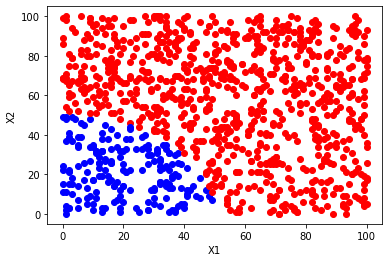

In [44]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])
        
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()        

In [45]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [46]:
model.fit(X, y)

Miscoding:  0.5286214548708892 Inaccuracy:  0.650114749339496 Redundancy:  0.25 Nescience:  0.677215755470256
Miscoding:  0.0 Inaccuracy:  0.2449820479188091 Redundancy:  0.46308724832214765 Nescience:  2.9998127711243666e-05
Miscoding:  0.0 Inaccuracy:  0.22131565934961567 Redundancy:  0.5848214285714286 Nescience:  2.9998131609341822e-05
Final nescience: 2.9998131609341822e-05
def tree{'X2', 'X1'}:
    if X1 < 76.500:
        if X2 < 28.500:
            if X1 < 46.000:
                return 0
            else:
                return 1
        else:
            return 1
    else:
        return 1



NescienceDecisionTreeClassifier(verbose=True)

In [47]:
model.score(X, y)

0.9359999999999999

I would say this is a good approximation of a non linear dataset with a linear model.

Compare with scikit-learn

In [48]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

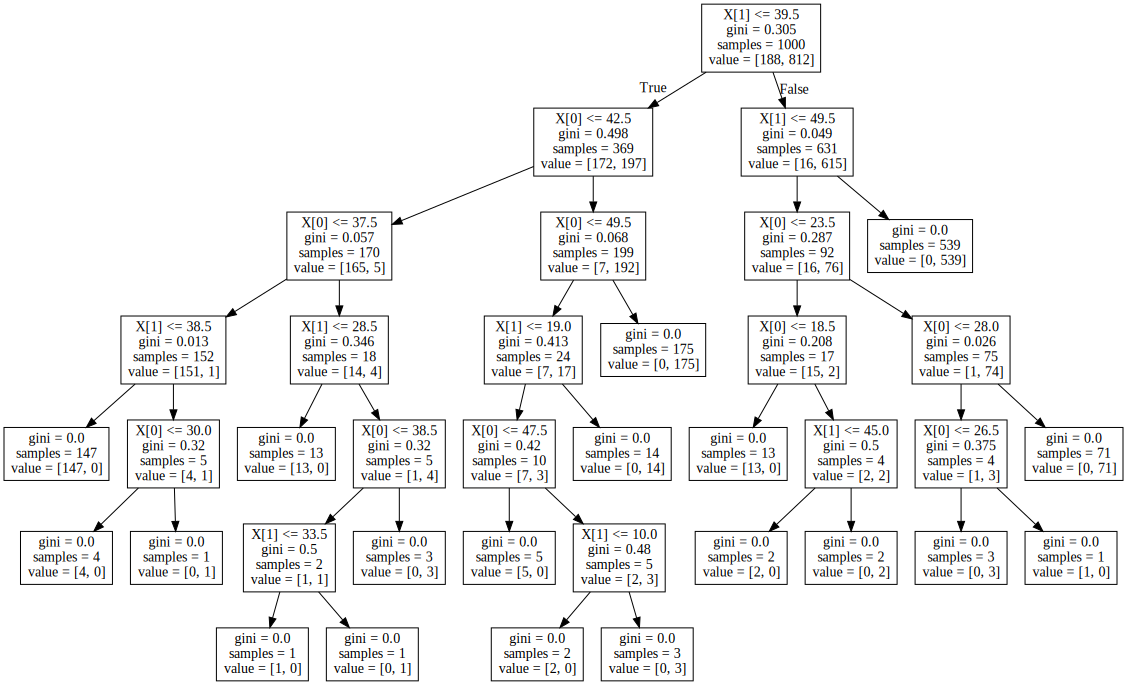

In [49]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

Check if we can avoid to overoptimize

In [50]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X, y)
model_sk.score(X, y)

0.993

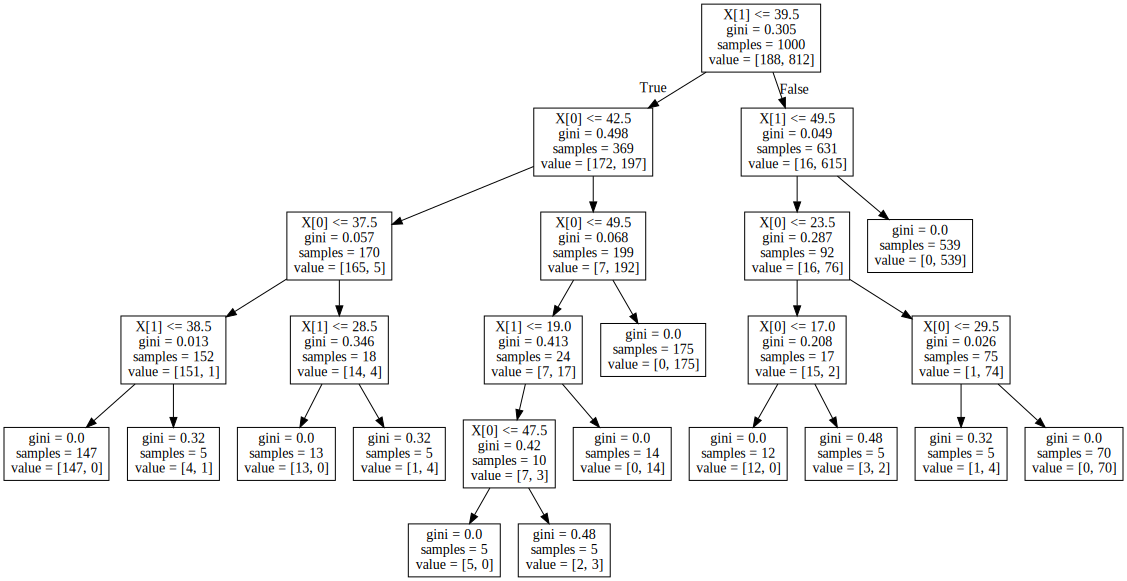

In [51]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

Sill a very complex model. Is that a good model?

### Isotropic Gaussian Blobs

In [52]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=3, random_state=1)

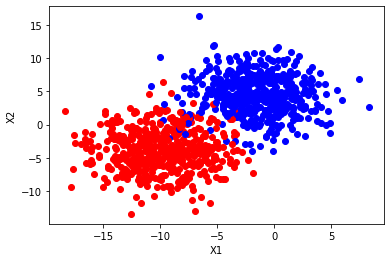

In [53]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [54]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [55]:
model.fit(X, y)

Miscoding:  0.5021997529523314 Inaccuracy:  0.081 Redundancy:  0.23750000000000004 Nescience:  0.1956064376119957
Miscoding:  0.0 Inaccuracy:  0.05 Redundancy:  0.43918918918918914 Nescience:  2.9993318411529252e-05
Miscoding:  0.0 Inaccuracy:  0.036 Redundancy:  0.5639810426540284 Nescience:  2.9991137352884395e-05
Final nescience: 2.9991137352884395e-05
def tree{'X2', 'X1'}:
    if X1 < -5.034:
        if X2 < 3.339:
            return 1
        else:
            return 0
    else:
        if X2 < -4.000:
            return 1
        else:
            return 0



NescienceDecisionTreeClassifier(verbose=True)

In [56]:
model.score(X, y)

0.964

In [57]:
model = DecisionTreeClassifier(min_samples_leaf=5)
model.fit(X, y)
model.score(X, y)

0.981

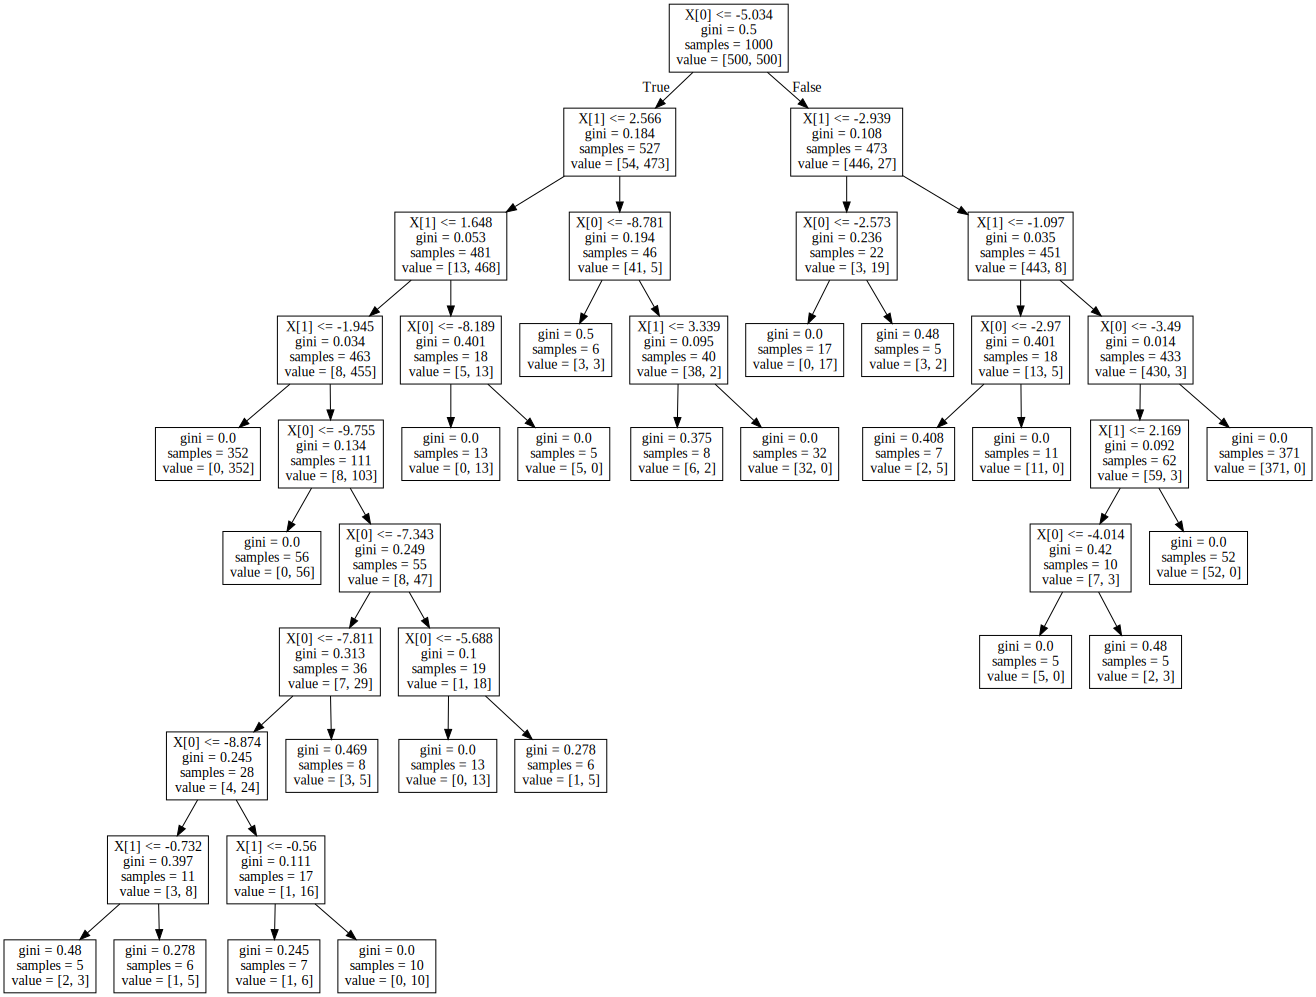

In [58]:
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph

### Moving Isotropic Gaussian Blobs

In [59]:
scr_sd = list()

scr_ns = list()
scr_dt = list()

nodes_ns = list()
nodes_dt = list()

for sd in np.arange(1.5, 3.5, 0.01):
        
    scr_sd.append(sd)
    
    X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = NescienceDecisionTreeClassifier()
    model.fit(X_train, y_train)
    scr_ns.append(model.score(X_test, y_test))
    nodes_ns.append(model._nodecount())
    
    model = DecisionTreeClassifier(min_samples_leaf=5)
    model.fit(X_train, y_train)
    scr_dt.append(model.score(X_test, y_test))
    nodes_dt.append(model.tree_.node_count)

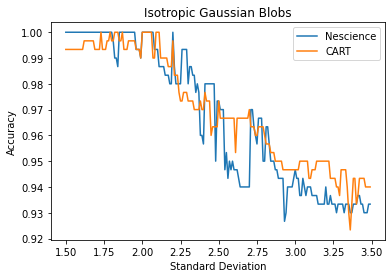

In [60]:
plt.plot(scr_sd, scr_ns, label="Nescience")
plt.plot(scr_sd, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Accuracy")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

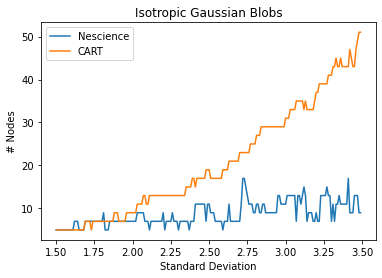

In [61]:
plt.plot(scr_sd, nodes_ns, label="Nescience")
plt.plot(scr_sd, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("# Nodes")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

### Moving Isotropic Gaussian Blobs x100

In [32]:
scr_sd = list()

scr_ns = list()
scr_dt = list()

nodes_ns = list()
nodes_dt = list()

depth_ns = list()
depth_dt = list()

for sd in np.arange(2.5, 4.5, 0.01):
            
    my_scr_ns = list()
    my_scr_dt = list()

    my_nodes_ns = list()
    my_nodes_dt = list()

    my_depth_ns = list()
    my_depth_dt = list()

    for k in range(100):
        
        X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
        model = NescienceDecisionTreeClassifier()
        model.fit(X_train, y_train)
        my_scr_ns.append(model.score(X_test, y_test))
        my_nodes_ns.append(model._nodecount())
        my_depth_ns.append(model._maxdepth())
        
        model = DecisionTreeClassifier(min_samples_leaf=5)
        model.fit(X_train, y_train)
        my_scr_dt.append(model.score(X_test, y_test))
        my_nodes_dt.append(model.tree_.node_count)
        my_depth_dt.append(model.tree_.max_depth)        

    scr_sd.append(sd)        
    scr_ns.append(np.mean(my_scr_ns))
    scr_dt.append(np.mean(my_scr_dt))
    nodes_ns.append(np.mean(my_nodes_ns))
    nodes_dt.append(np.mean(my_nodes_dt))
    depth_ns.append(np.mean(my_depth_ns))
    depth_dt.append(np.mean(my_depth_dt))

In [61]:
scr_sd = list()

scr_dt = list()
nodes_dt = list()
depth_dt = list()

for sd in np.arange(2.5, 4.5, 0.01):
            
    my_scr_dt = list()
    my_nodes_dt = list()
    my_depth_dt = list()

    for k in range(100):
        
        X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        model = DecisionTreeClassifier(min_samples_leaf=5)
        model.fit(X_train, y_train)
        my_scr_dt.append(model.score(X_test, y_test))
        my_nodes_dt.append(model.tree_.node_count)
        my_depth_dt.append(model.tree_.max_depth)        

    scr_sd.append(sd)        
    scr_dt.append(np.mean(my_scr_dt))
    nodes_dt.append(np.mean(my_nodes_dt))
    depth_dt.append(np.mean(my_depth_dt))

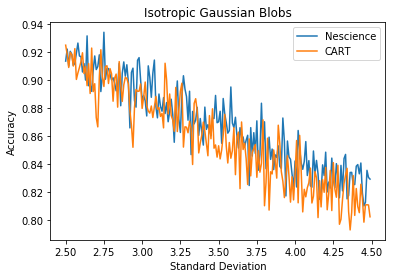

In [62]:
plt.plot(scr_sd, scr_ns, label="Nescience")
plt.plot(scr_sd, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Accuracy")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

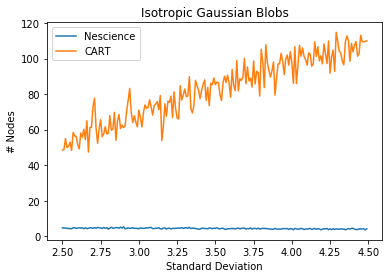

In [63]:
plt.plot(scr_sd, nodes_ns, label="Nescience")
plt.plot(scr_sd, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("# Nodes")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

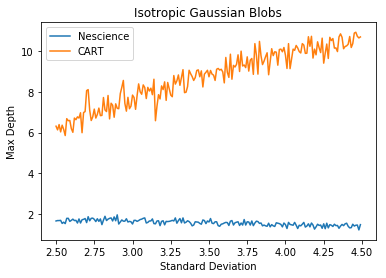

In [64]:
plt.plot(scr_sd, depth_ns, label="Nescience")
plt.plot(scr_sd, depth_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Max Depth")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

Find optimal "number of leafs" hyperparamter for CART

In [ ]:
msl_dt = list()

scr_dt   = list()
nodes_dt = list()
depth_dt = list()

for msl in np.arange(1, 60, 1):
    
    scr_dt_tmp   = list()
    nodes_dt_tmp = list()
    depth_dt_tmp = list()
    
    for sd in np.arange(2.5, 4.5, 0.01):
            
        my_scr_dt   = list()
        my_nodes_dt = list()
        my_depth_dt = list()

        for k in range(100):
        
            X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
            
            model = DecisionTreeClassifier(min_samples_leaf=msl)
            model.fit(X_train, y_train)
            my_scr_dt.append(model.score(X_test, y_test))
            my_nodes_dt.append(model.tree_.node_count)
            my_depth_dt.append(model.tree_.max_depth)        

        scr_dt_tmp.append(np.mean(my_scr_dt))
        nodes_dt_tmp.append(np.mean(my_nodes_dt))
        depth_dt_tmp.append(np.mean(my_depth_dt))
        
    msl_dt.append(msl)
    scr_dt.append(np.mean(scr_dt_tmp))
    nodes_dt.append(np.mean(nodes_dt_tmp))
    depth_dt.append(np.mean(depth_dt_tmp))
    

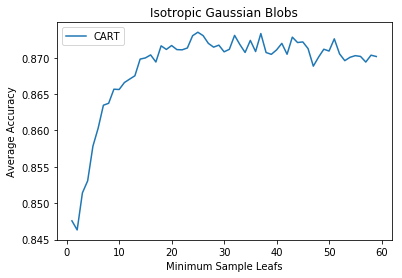

In [66]:
plt.plot(msl_dt, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Average Accuracy")
plt.xlabel("Minimum Sample Leafs")
plt.legend(loc='best')

In [67]:
np.max(scr_dt)

0.8734971666666667

In [68]:
np.where(scr_dt == np.max(scr_dt))

(array([24]),)

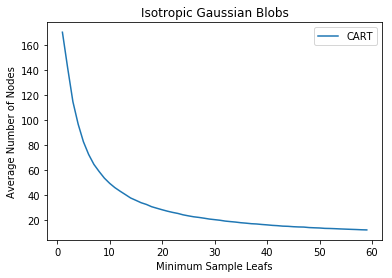

In [69]:
plt.plot(msl_dt, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Average Number of Nodes")
plt.xlabel("Minimum Sample Leafs")
plt.legend(loc='best')

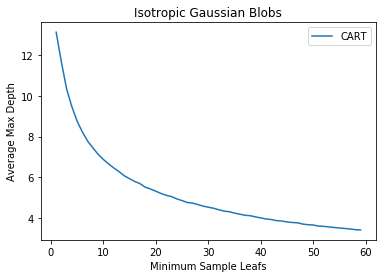

In [70]:
plt.plot(msl_dt, depth_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Average Max Depth")
plt.xlabel("Minimum Sample Leafs")
plt.legend(loc='best')

In [71]:
np.mean(scr_ns)

0.8682860000000001

Find optimal "maximum depth" hyperparamter for CART

In [25]:
msl_dt = list()

scr_dt   = list()
nodes_dt = list()
depth_dt = list()

for msl in np.arange(2, 100):
    
    scr_dt_tmp   = list()
    nodes_dt_tmp = list()
    depth_dt_tmp = list()
    
    for sd in np.arange(2.5, 4.5, 0.01):
            
        my_scr_dt   = list()
        my_nodes_dt = list()
        my_depth_dt = list()

        for k in range(100):
        
            X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
            
            model = DecisionTreeClassifier(max_leaf_nodes=msl)
            model.fit(X_train, y_train)
            my_scr_dt.append(model.score(X_test, y_test))
            my_nodes_dt.append(model.tree_.node_count)
            my_depth_dt.append(model.tree_.max_depth)        

        scr_dt_tmp.append(np.mean(my_scr_dt))
        nodes_dt_tmp.append(np.mean(my_nodes_dt))
        depth_dt_tmp.append(np.mean(my_depth_dt))
        
    msl_dt.append(msl)
    scr_dt.append(np.mean(scr_dt_tmp))
    nodes_dt.append(np.mean(nodes_dt_tmp))
    depth_dt.append(np.mean(depth_dt_tmp))
    

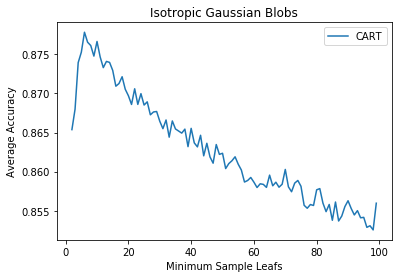

In [26]:
plt.plot(msl_dt, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Average Accuracy")
plt.xlabel("Minimum Sample Leafs")
plt.legend(loc='best')

In [27]:
np.max(scr_dt)

0.8778158333333334

In [28]:
np.where(scr_dt == np.max(scr_dt))

(array([4]),)

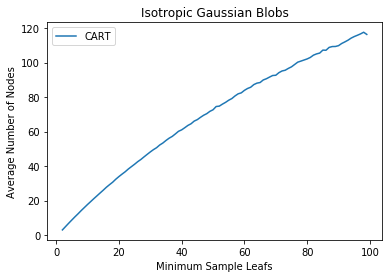

In [29]:
plt.plot(msl_dt, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Average Number of Nodes")
plt.xlabel("Minimum Sample Leafs")
plt.legend(loc='best')

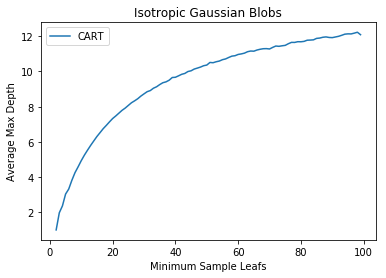

In [30]:
plt.plot(msl_dt, depth_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Average Max Depth")
plt.xlabel("Minimum Sample Leafs")
plt.legend(loc='best')

In [71]:
np.mean(scr_ns)

0.8682860000000001

Repeat the experiment using an optimal hyperparameter for CART

In [31]:
scr_dto = list()
nodes_dto = list()
depth_dto = list()

for sd in np.arange(2.5, 4.5, 0.01):
            
    my_scr_dto = list()
    my_nodes_dto = list()
    my_depth_dto = list()

    for k in range(100):
        
        X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # model = DecisionTreeClassifier(min_samples_leaf=26)
        model = DecisionTreeClassifier(max_leaf_nodes=4)

        model.fit(X_train, y_train)
        my_scr_dto.append(model.score(X_test, y_test))
        my_nodes_dto.append(model.tree_.node_count)
        my_depth_dto.append(model.tree_.max_depth)        

    scr_dto.append(np.mean(my_scr_dto))
    nodes_dto.append(np.mean(my_nodes_dto))
    depth_dto.append(np.mean(my_depth_dto))

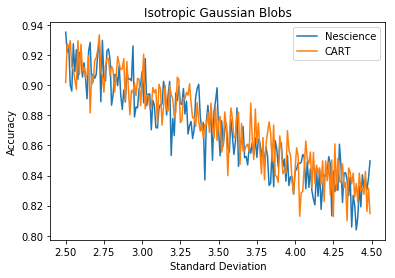

In [33]:
plt.plot(scr_sd, scr_ns, label="Nescience")
plt.plot(scr_sd, scr_dto, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Accuracy")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [34]:
np.mean(scr_ns)

0.8705076666666668

In [35]:
np.mean(scr_dto)

0.8732871666666668

In [36]:
np.std(scr_ns)

0.030531262067665096

In [37]:
np.std(scr_dto)

0.0296143232382763

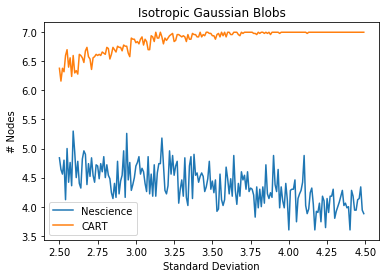

In [38]:
plt.plot(scr_sd, nodes_ns, label="Nescience")
plt.plot(scr_sd, nodes_dto, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("# Nodes")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [39]:
np.mean(nodes_ns)

4.374099999999999

In [40]:
np.mean(nodes_dto)

6.870699999999999

In [41]:
np.std(nodes_ns)

0.3296227995755148

In [42]:
np.std(nodes_dto)

0.18713500474256548

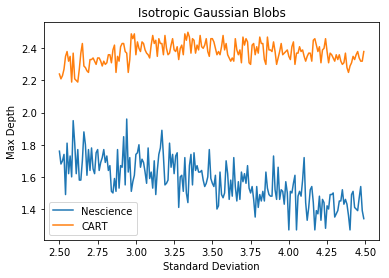

In [43]:
plt.plot(scr_sd, depth_ns, label="Nescience")
plt.plot(scr_sd, depth_dto, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Max Depth")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [44]:
np.mean(depth_ns)

1.5742500000000001

In [45]:
np.mean(depth_dto)

2.37115

In [46]:
np.std(depth_ns)

0.1374643135508267

In [47]:
np.std(depth_dto)

0.06367242338720903

### Moving Moons

In [85]:
X, y = make_circles(n_samples=100, noise=0.05)

scr_sd = list()

scr_ns = list()
scr_dt = list()

nodes_ns = list()
nodes_dt = list()

for sd in np.arange(0.1, 0.5, 0.01):
        
    scr_sd.append(sd)
    
    X, y = make_moons(n_samples=100, noise=0.1, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = NescienceDecisionTreeClassifier()
    model.fit(X_train, y_train)
    scr_ns.append(model.score(X_test, y_test))
    nodes_ns.append(model._nodecount())
    
    model = DecisionTreeClassifier(min_samples_leaf=5)
    model.fit(X_train, y_train)
    scr_dt.append(model.score(X_test, y_test))
    nodes_dt.append(model.tree_.node_count)

NameError: name 'make_circles' is not defined

In [ ]:
plt.plot(scr_sd, scr_ns, label="Nescience")
plt.plot(scr_sd, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Accuracy")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [ ]:
plt.plot(scr_sd, nodes_ns, label="Nescience")
plt.plot(scr_sd, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("# Nodes")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

### Use Multiple Features

In [86]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=12, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)

In [87]:
model = NescienceDecisionTreeClassifier(verbose=True)

In [88]:
model.fit(X, y)

Miscoding:  0.897860892644379 Inaccuracy:  0.8523483047348317 Redundancy:  0.25 Nescience:  0.9126897914219532
Inaccuracy:  0.7867737568058386 Redundancy:  0.26 Nescience:  0.8599643214152832
Inaccuracy:  0.7495674126551618 Redundancy:  0.43965517241379315 Nescience:  0.8083644059951801
Inaccuracy:  0.7098844282216462 Redundancy:  0.5333333333333333 Nescience:  0.7727274790677485
Inaccuracy:  0.6699770620713301 Redundancy:  0.6096938775510203 Nescience:  0.7583922748716432
Inaccuracy:  0.6507846068499782 Redundancy:  0.6532769556025371 Nescience:  0.6593968437061981
Inaccuracy:  0.6241558787655703 Redundancy:  0.6778169014084507 Nescience:  0.6589748973438782
Final nescience: 0.6589748973438782
def tree{'X19', 'X5', 'X14', 'X10', 'X8', 'X6', 'X9'}:
    if X8 < -0.361:
        if X6 < 4.311:
            return 0
        else:
            return 1
    else:
        if X19 < 1.060:
            if X10 < 1.096:
                return 1
            else:
                if X5 < 1.061:
      

NescienceDecisionTreeClassifier(compressor='bz2', nescience_method='Harmonic',
                verbose=True)

In [89]:
model.score(X, y)

0.843

In [90]:
model = DecisionTreeClassifier(min_samples_leaf=5)
model.fit(X, y)
model.score(X, y)

0.938

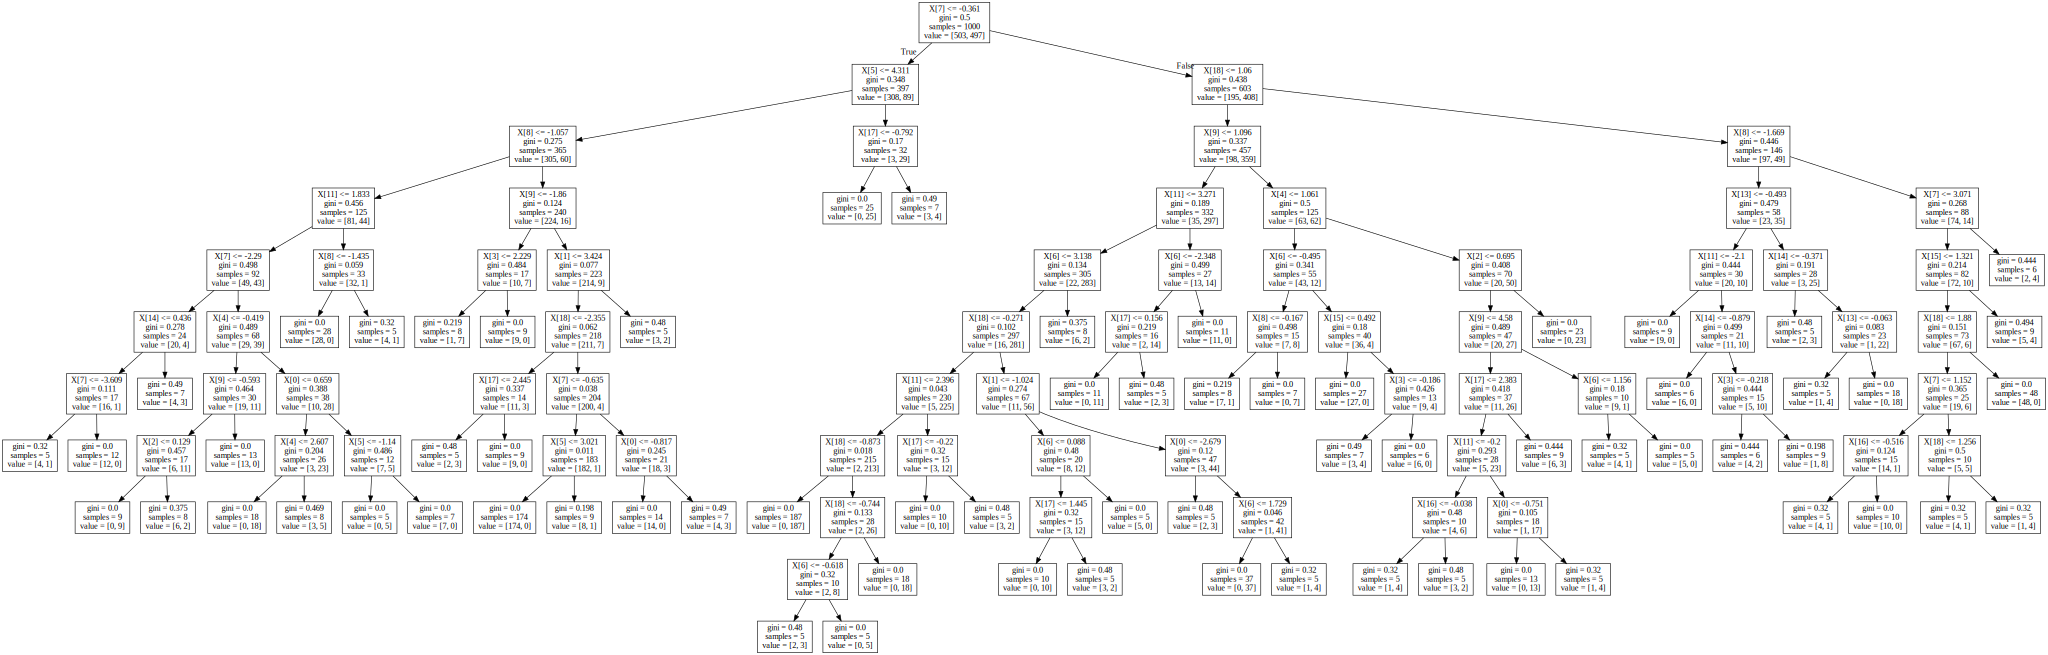

In [91]:
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph

### TEST: Study the effect of errors

Lets see how the models behave when we change the number of errors

In [92]:
scr_err = list()
scr_nes = list()
scr_dt  = list()

for err in np.arange(0.01, 0.2, 0.01):
    
    scr_err.append(err)
    
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=12, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, flip_y=err, class_sep=1.0, shift=0.0, scale=1.0, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = NescienceDecisionTreeClassifier()
    model.fit(X_train, y_train)
    scr_nes.append(model.score(X_test, y_test))
    
    model = DecisionTreeClassifier(min_samples_leaf=5)
    model.fit(X_train, y_train)
    scr_dt.append(model.score(X_test, y_test))

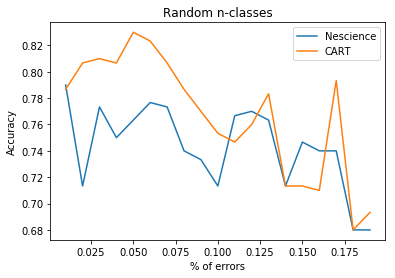

In [93]:
plt.plot(scr_err, scr_nes, label="Nescience")
plt.plot(scr_err, scr_dt, label="CART")
plt.title("Random n-classes")
plt.ylabel("Accuracy")
plt.xlabel("% of errors")
plt.legend(loc='best')

### TEST: Study the number of relevant features

In [94]:
n_fea = 30

scr_fea = list()
scr_nes = list()
scr_dt  = list()

for k in range(2, n_fea-2):
    
    scr_fea.append(k)

    X, y = make_classification(n_samples=1000, n_features=n_fea, n_informative=k, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = NescienceDecisionTreeClassifier()
    model.fit(X_train, y_train)
    scr_nes.append(model.score(X_test, y_test))
    
    model = DecisionTreeClassifier(min_samples_leaf=5)
    model.fit(X_train, y_train)
    scr_dt.append(model.score(X_test, y_test))

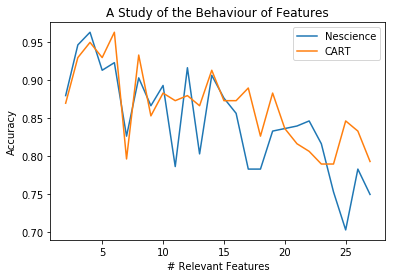

In [95]:
plt.plot(scr_fea, scr_nes, label="Nescience")
plt.plot(scr_fea, scr_dt, label="CART")
plt.title("A Study of the Behaviour of Features")
plt.ylabel("Accuracy")
plt.xlabel("# Relevant Features")
plt.legend(loc='best')

### TEST: Study the multiple classes

In [97]:
scr_cla = list()
scr_nes = list()
scr_dt  = list()

for cla in np.arange(2, 18, 1):
        
    scr_cla.append(cla)
    
    X, y = make_classification(n_samples=1000, n_features=30, n_informative=20, n_redundant=0, n_repeated=0, n_classes=cla, n_clusters_per_class=1, flip_y=0.01, class_sep=1.0, shift=0.0, scale=1.0, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = NescienceDecisionTreeClassifier()
    model.fit(X_train, y_train)
    scr_nes.append(model.score(X_test, y_test))
    
    model = DecisionTreeClassifier(min_samples_leaf=5)
    model.fit(X_train, y_train)
    scr_dt.append(model.score(X_test, y_test))

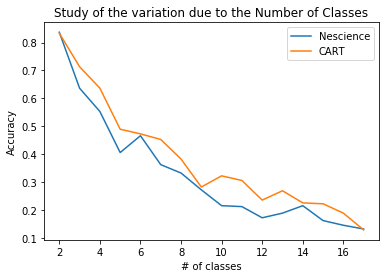

In [98]:
plt.plot(scr_cla, scr_nes, label="Nescience")
plt.plot(scr_cla, scr_dt, label="CART")
plt.title("Study of the variation due to the Number of Classes")
plt.ylabel("Accuracy")
plt.xlabel("# of classes")
plt.legend(loc='best')

### Performance Profiling

Breast cancer dataset

In [99]:
data = load_breast_cancer()
model = NescienceDecisionTreeClassifier()

In [100]:
model.fit(data.data, data.target)

NescienceDecisionTreeClassifier(compressor='bz2', nescience_method='Harmonic',
                verbose=False)

In [101]:
model.score(data.data, data.target)

0.9349736379613357

In [102]:
%timeit model.fit(data.data, data.target)

5.77 s ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
%timeit model.score(data.data, data.target)

633 µs ± 7.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [104]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)

In [105]:
%timeit model_sk.fit(data.data, data.target)

4.8 ms ± 45.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [106]:
%timeit model_sk.score(data.data, data.target)

153 µs ± 822 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Yeast dataset

In [107]:
data = pd.read_csv("/home/rleiva/Projects/Nescience/DataScience/DecisionTrees/data/Yeast/yeast.csv")
y = data['Y'].tolist()
X = data.drop('Y', axis=1).values.tolist()
X = np.array(X)
y = np.array(y)

FileNotFoundError: [Errno 2] File b'/home/rleiva/Projects/Nescience/DataScience/DecisionTrees/data/Yeast/yeast.csv' does not exist: b'/home/rleiva/Projects/Nescience/DataScience/DecisionTrees/data/Yeast/yeast.csv'

In [ ]:
model = NescienceDecisionTreeClassifier()

In [ ]:
model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
%timeit model.fit(X, y)

In [ ]:
%timeit model.score(X, y)

In [ ]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)

In [ ]:
model_sk.fit(X, y)

In [ ]:
model_sk.score(X, y)

In [ ]:
%timeit model_sk.fit(X, y)

In [ ]:
%timeit model_sk.score(X, y)

In [ ]:
data = pd.read_csv("/home/rleiva/Projects/Nescience/DataScience/DecisionTrees/data/Magic/magic04.csv")
y = data['y'].tolist()
X = data.drop('y', axis=1).values.tolist()
X = np.array(X)
y = np.array(y)

In [ ]:
%timeit for i in range(1, 25): model = DecisionTreeClassifier(max_depth=i); model.fit(X, y)

In [ ]:
%timeit model = NescienceDecisionTreeClassifierPaper(); model.fit(X, y)

### Advanced Performance

In [ ]:
data = load_breast_cancer()
model = NescienceDecisionTreeClassifier()

In [ ]:
%prun -l NescienceDecisionTreeClassifier.py model.fit(data.data, data.target)

In [ ]:
%prun -l NescienceDecisionTreeClassifier.py model.fit(data.data, data.target)

### Pstats

In [1]:
import pstats

In [2]:
p1 = pstats.Stats('../performance/sal1')

In [3]:
p1.sort_stats('cumulative').print_stats(15)

Fri Apr 27 16:25:11 2018    ../performance/sal1

         7211108296 function calls (7211089816 primitive calls) in 4879.352 seconds

   Ordered by: cumulative time
   List reduced from 3640 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    624/1    0.017    0.000 4879.353 4879.353 {built-in method builtins.exec}
        1    0.000    0.000 4879.353 4879.353 NescienceDecisionTree_v0.1.py:27(<module>)
        1    0.018    0.018 4878.770 4878.770 NescienceDecisionTree_v0.1.py:89(fit)
        3   75.154   25.051 4869.929 1623.310 NescienceDecisionTree_v0.1.py:503(_create_node)
   907210    9.410    0.000 4794.088    0.005 NescienceDecisionTree_v0.1.py:379(_entropy_split)
   907213 2990.652    0.003 3370.720    0.004 NescienceDecisionTree_v0.1.py:482(_split_data)
  1814420 1410.126    0.001 1412.947    0.001 NescienceDecisionTree_v0.1.py:333(_entropy)
        1    0.000    0.000 1098.988 1098.988 NescienceDecisionTree_v0.1.py:580(_b

In [4]:
p2 = pstats.Stats('../performance/sal2')

In [5]:
p2.sort_stats('cumulative').print_stats(15)

Fri Apr 27 15:49:50 2018    ../performance/sal2

         29165352 function calls (29108781 primitive calls) in 2748.056 seconds

   Ordered by: cumulative time
   List reduced from 3641 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    624/1    0.017    0.000 2748.056 2748.056 {built-in method builtins.exec}
        1    0.000    0.000 2748.056 2748.056 NescienceDecisionTree_v0.2.py:23(<module>)
        1    0.004    0.004 2747.433 2747.433 NescienceDecisionTree_v0.2.py:83(fit)
        5   11.388    2.278 2727.697  545.539 NescienceDecisionTree_v0.2.py:547(_create_node)
  1249133   24.266    0.000 2715.443    0.002 NescienceDecisionTree_v0.2.py:419(_entropy_split)
  1249138 2469.040    0.002 2544.485    0.002 NescienceDecisionTree_v0.2.py:525(_split_data)
  2498266   41.645    0.000  144.880    0.000 NescienceDecisionTree_v0.2.py:376(_entropy)
  2498016   28.663    0.000   96.772    0.000 /home/rleiva/anaconda3/lib/python3.5/sit

In [6]:
p3 = pstats.Stats('../performance/sal3')

In [7]:
p3.sort_stats('cumulative').print_stats(15)

Fri Apr 27 15:50:09 2018    ../performance/sal3

         29195203 function calls (29124030 primitive calls) in 2759.572 seconds

   Ordered by: cumulative time
   List reduced from 3641 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    624/1    0.028    0.000 2759.574 2759.574 {built-in method builtins.exec}
        1    0.000    0.000 2759.574 2759.574 NescienceDecisionTree_v0.3.py:23(<module>)
        1    0.006    0.006 2758.477 2758.477 NescienceDecisionTree_v0.3.py:87(fit)
        5   11.699    2.340 2738.469  547.694 NescienceDecisionTree_v0.3.py:603(_create_node)
  1249133   23.699    0.000 2725.850    0.002 NescienceDecisionTree_v0.3.py:463(_entropy_split)
  1249138 2480.844    0.002 2555.790    0.002 NescienceDecisionTree_v0.3.py:581(_split_data)
  2498266   41.741    0.000  144.683    0.000 NescienceDecisionTree_v0.3.py:420(_entropy)
  2498016   28.188    0.000   96.384    0.000 /home/rleiva/anaconda3/lib/python3.5/sit

In [8]:
p4a = pstats.Stats('../performance/sal4a')

In [9]:
p4a.sort_stats('cumulative').print_stats(15)

Fri Apr 27 15:57:50 2018    ../performance/sal4a

         88921837 function calls (88857098 primitive calls) in 3211.080 seconds

   Ordered by: cumulative time
   List reduced from 3647 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    624/1    0.034    0.000 3211.082 3211.082 {built-in method builtins.exec}
        1    0.001    0.001 3211.082 3211.082 NescienceDecisionTree_v0.4a.py:22(<module>)
        1    0.009    0.009 3209.541 3209.541 NescienceDecisionTree_v0.4a.py:87(fit)
        6   11.103    1.851 3180.576  530.096 NescienceDecisionTree_v0.4a.py:573(_create_node)
  1382018  117.286    0.000 3168.416    0.002 NescienceDecisionTree_v0.4a.py:437(_entropy_split)
  1382024  554.774    0.000 2891.540    0.002 NescienceDecisionTree_v0.4a.py:553(_split_data)
  2764048  339.228    0.000 2227.124    0.001 /home/rleiva/anaconda3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:297(intersect1d)
  8291994 1245.251    0.000 124

In [10]:
p4b = pstats.Stats('../performance/sal4b')

In [11]:
p4b.sort_stats('cumulative').print_stats(15)

Fri Apr 27 17:06:56 2018    ../performance/sal4b

         80399910 function calls (80337924 primitive calls) in 1381.227 seconds

   Ordered by: cumulative time
   List reduced from 3647 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    624/1    0.040    0.000 1381.228 1381.228 {built-in method builtins.exec}
        1    0.000    0.000 1381.228 1381.228 NescienceDecisionTree_v0.4b.py:22(<module>)
        1    0.002    0.002 1361.988 1361.988 NescienceDecisionTree_v0.4b.py:87(fit)
        5    2.838    0.568 1352.344  270.469 NescienceDecisionTree_v0.4b.py:542(_create_node)
  1249133   24.042    0.000 1349.074    0.001 NescienceDecisionTree_v0.4b.py:406(_entropy_split)
  1249138   77.073    0.000 1278.571    0.001 NescienceDecisionTree_v0.4b.py:522(_split_data)
  2498276  182.760    0.000 1135.595    0.000 /home/rleiva/anaconda3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:297(intersect1d)
  7494693  755.309    0.000  75

In [12]:
p4c = pstats.Stats('../performance/sal4c')

In [13]:
p4c.sort_stats('cumulative').print_stats(15)

Fri Apr 27 17:12:00 2018    ../performance/sal4c

         2095271 function calls (2033255 primitive calls) in 35.004 seconds

   Ordered by: cumulative time
   List reduced from 3660 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    624/1    0.016    0.000   35.004   35.004 {built-in method builtins.exec}
        1    0.000    0.000   35.004   35.004 NescienceDecisionTree_v0.4c.py:22(<module>)
        1    0.001    0.001   34.434   34.434 NescienceDecisionTree_v0.4c.py:87(fit)
        5    0.241    0.048   24.647    4.929 NescienceDecisionTree_v0.4c.py:542(_create_node)
    25000    0.419    0.000   24.149    0.001 NescienceDecisionTree_v0.4c.py:406(_entropy_split)
    25005    1.550    0.000   22.824    0.001 NescienceDecisionTree_v0.4c.py:522(_split_data)
    50010    3.120    0.000   19.933    0.000 /home/rleiva/anaconda3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:297(intersect1d)
   150030   13.118    0.000   13.11